# Bài tập tuần 5

* Lấy lại chuỗi chứng khoán của tuần 3
* Phân tích hàm sample ACF cho chuỗi thời gian trên 
* Tách trend theo 4 phương pháp MA(q), ES(alpha), Holt (alpha, beta), đa thức bậc nhất. Sau khi bỏ đi trend phân tích hàm sample  ACF của chuỗi còn lại 

In [2]:
# /*==========================================================================================*\
# **                        _           _ _   _     _  _         _                            **
# **                       | |__  _   _/ | |_| |__ | || |  _ __ | |__                         **
# **                       | '_ \| | | | | __| '_ \| || |_| '_ \| '_ \                        **
# **                       | |_) | |_| | | |_| | | |__   _| | | | | | |                       **
# **                       |_.__/ \__,_|_|\__|_| |_|  |_| |_| |_|_| |_|                       **
# \*==========================================================================================*/

# Author: Bùi Tiến Thành (@bu1th4nh)
# Date: 2022/11/13 15:21
# CTTN Toán tin K64

from datetime import date
import pandas as pd
# import pandas_profiling as pp
import numpy as np
import tkinter
import scipy as sp
import sklearn as sk
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
%matplotlib inline
import warnings
from tqdm import tqdm



## 1. Dữ liệu

Dữ liệu là mã chứng khoán của Disney (NYSE:DIS) trong 251 ngày gần nhất. Ta lấy giá đóng cửa ở cột Adj Close

In [3]:
df = pd.read_csv("DIS.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-11-01,169.210007,171.250000,169.089996,170.190002,170.190002,8182900
1,2021-11-02,170.029999,170.850006,168.979996,169.830002,169.830002,6777200
2,2021-11-03,169.699997,170.190002,168.369995,170.080002,170.080002,6829300
3,2021-11-04,170.029999,170.419998,168.669998,170.279999,170.279999,7505500
4,2021-11-05,173.500000,176.990005,172.330002,175.630005,175.630005,16859200


In [ ]:
# pp.ProfileReport(df)

Ta trích cột Adj Close và lấy giá trị 25 ngày gần nhất

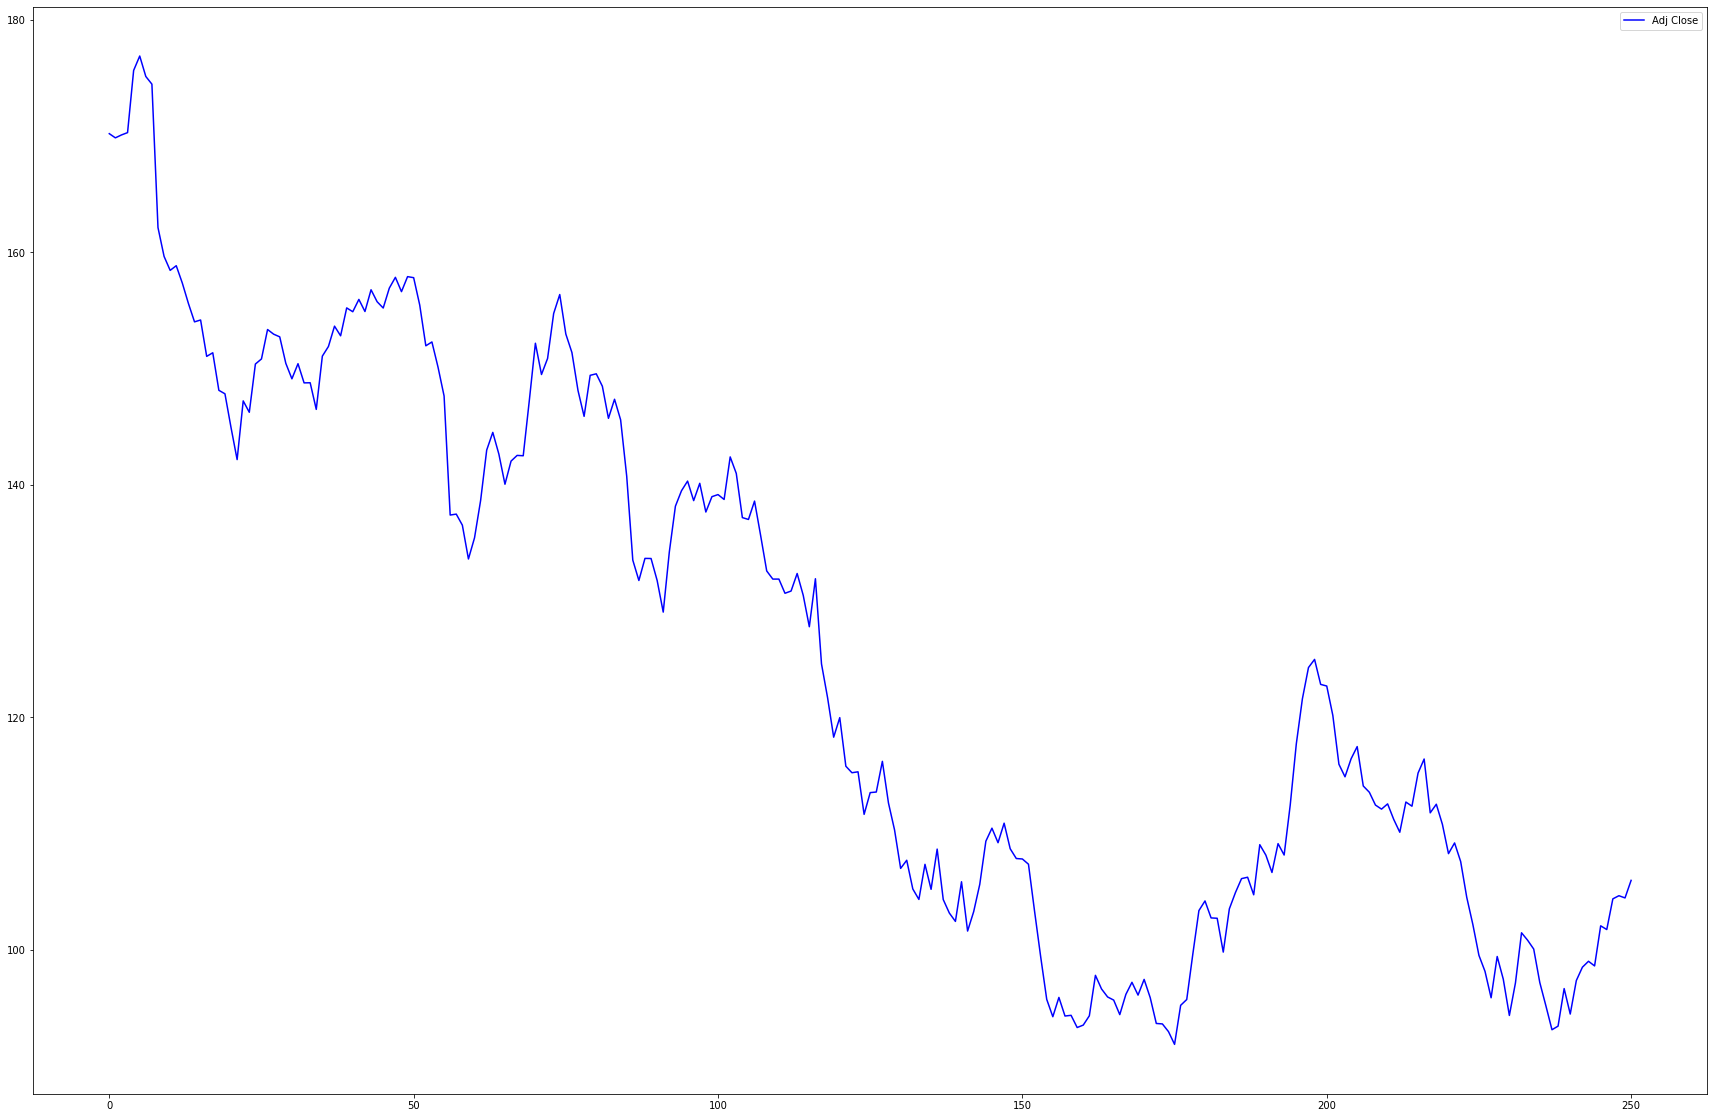

In [4]:
Ariel = df[["Adj Close"]]
Ariel.plot(figsize=(30,20), color='blue')
Ariel = np.ndarray.flatten(np.array(Ariel))
# print(Ariel)

## 2. Tính Sample ACF - Hàm tự tương quan mẫu

### 2.1. Tự build

In [48]:
import statsmodels.tsa.stattools as tsas;
from scipy.ndimage.interpolation import shift;

def sampleACVF(data, lag):
    ret  = 0.0;
    n    = len(data);
    xbar = np.mean(data);
    # print(xbar)

    for i in range(n - np.abs(lag)):
        ret += (data[i+np.abs(lag)] - xbar) * (data[i] - xbar);
    ret /= n;
    return float(ret);
    


def sampleACF_All(data):
    ACF   = [];
    data  = np.ndarray.flatten(data)
    idx   = range(len(data)+1);
    ACVF0 = sampleACVF(data, 0)
    # print(ACVF0)
    for i in tqdm(idx):
        ACF.append(
            sampleACVF(data, i) / ACVF0
        );
    return ACF;



def sampleACF_Analysis(data, save_fig = False):
    idx = range(len(data)+1);
    ACF = sampleACF_All(data);
    print(ACF)
    plt.figure(figsize=(30,20))
    plt.hlines(-0.2, xmin=np.nanmin(idx), xmax=np.nanmax(idx), colors='blue')
    plt.hlines( 0.2, xmin=np.nanmin(idx), xmax=np.nanmax(idx), colors='blue')
    plt.stem(idx, ACF)
    plt.ylim(-0.6, 1.2)
    plt.xlabel("Lag")
    plt.ylabel("ACF")
    plt.title("Sample ACF of data - DIY")
    plt.show()
    if(save_fig): plt.savefig('acf.pdf');

100%|██████████| 252/252 [00:00<00:00, 4768.17it/s]


[1.0, 0.9847796878922999, 0.9679313284206593, 0.9497230281790241, 0.9310369653874547, 0.9095941563425857, 0.8880620858857048, 0.8671676466227547, 0.8467451783708354, 0.8308759599190417, 0.8149722593237246, 0.7989428531625565, 0.7818410554081123, 0.765967165406883, 0.7501233856087406, 0.7362235204907457, 0.7237373258396441, 0.7137940287081038, 0.7046004561047864, 0.695771179618108, 0.6860215051826337, 0.6758656949293369, 0.6670883688173658, 0.6566214529373197, 0.6461492497404373, 0.6343227518490842, 0.6241516353976934, 0.6131882418734171, 0.6029280454760613, 0.5937980539910022, 0.5859686410147396, 0.5785677116116194, 0.5702608617336672, 0.5626022093169992, 0.5539581963558059, 0.5454246805800814, 0.534546769908972, 0.5226168409535453, 0.5097284787595296, 0.49754088599678736, 0.48505484892273887, 0.47318777551391056, 0.46300104767606537, 0.4524612285896115, 0.4412659850629898, 0.42998029093979334, 0.41976256627976055, 0.40839596838041764, 0.39618576635510355, 0.3834967738166231, 0.3715972

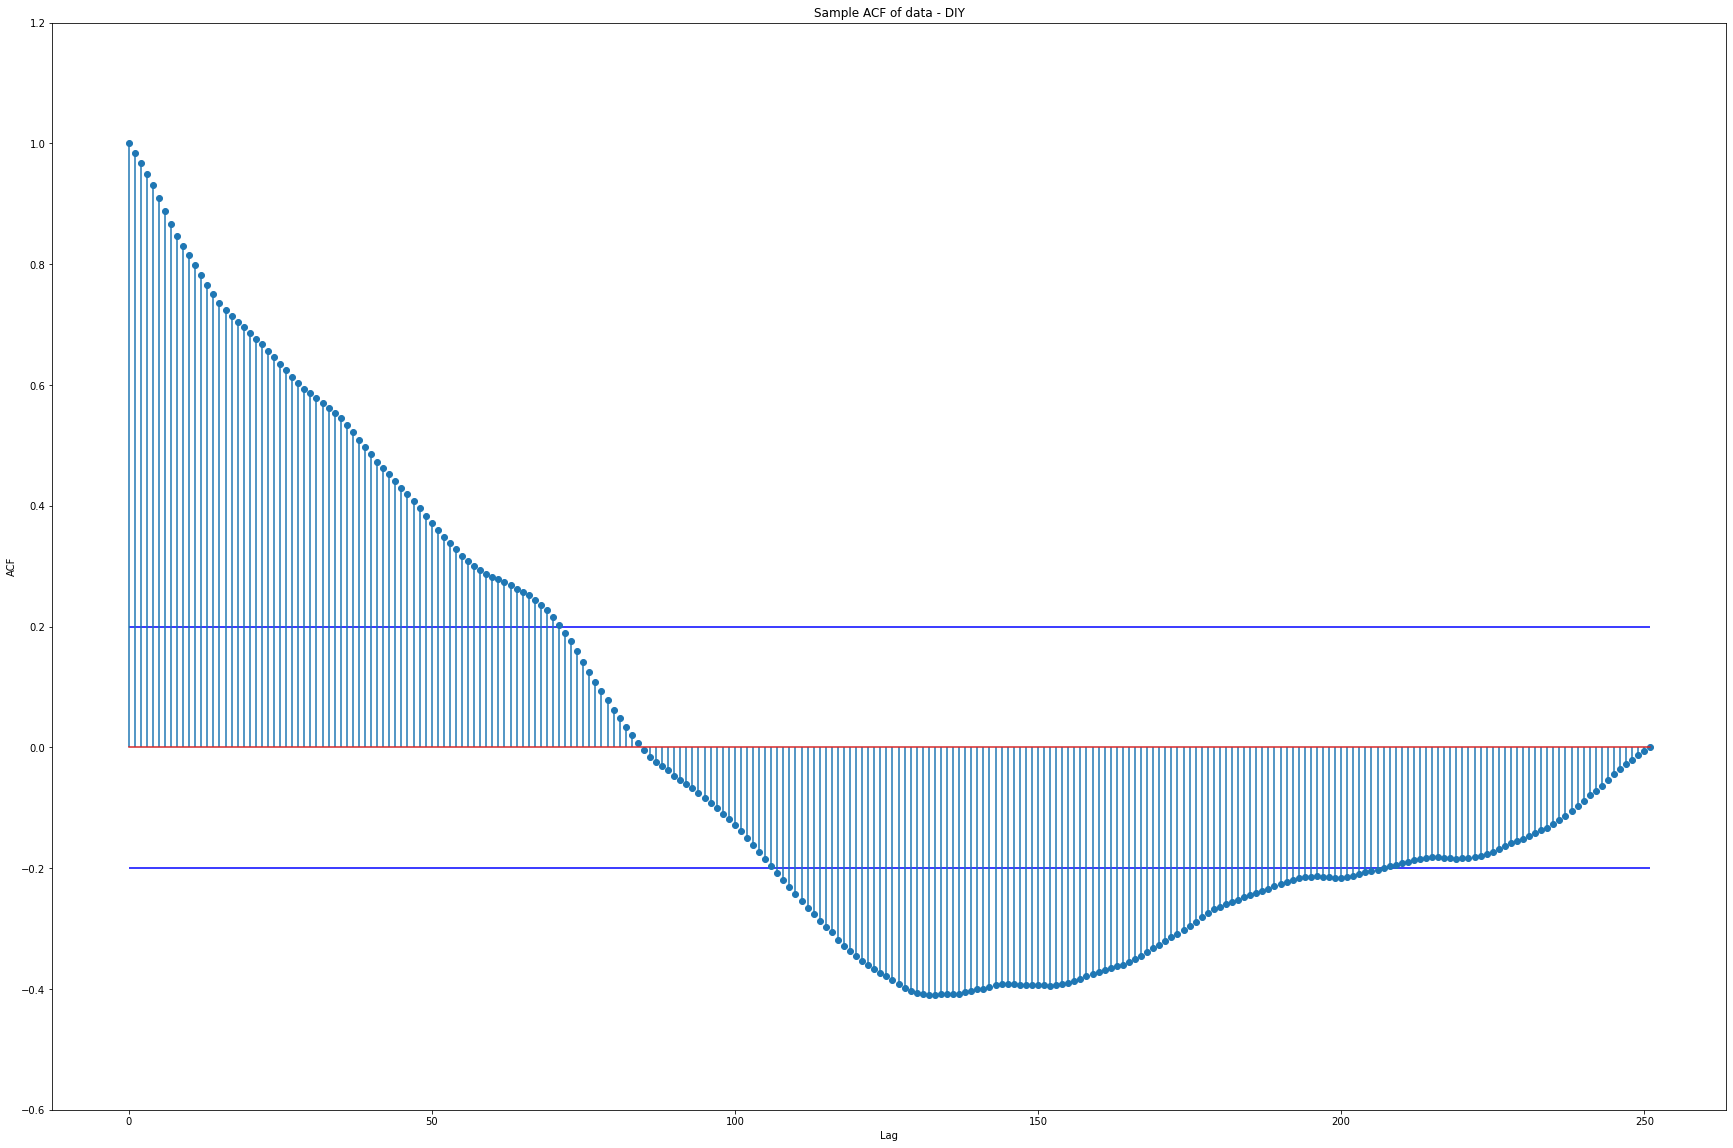

<Figure size 432x288 with 0 Axes>

In [49]:
sampleACF_Analysis(Ariel, save_fig=True)

### 2.2. Dùng gói có sẵn

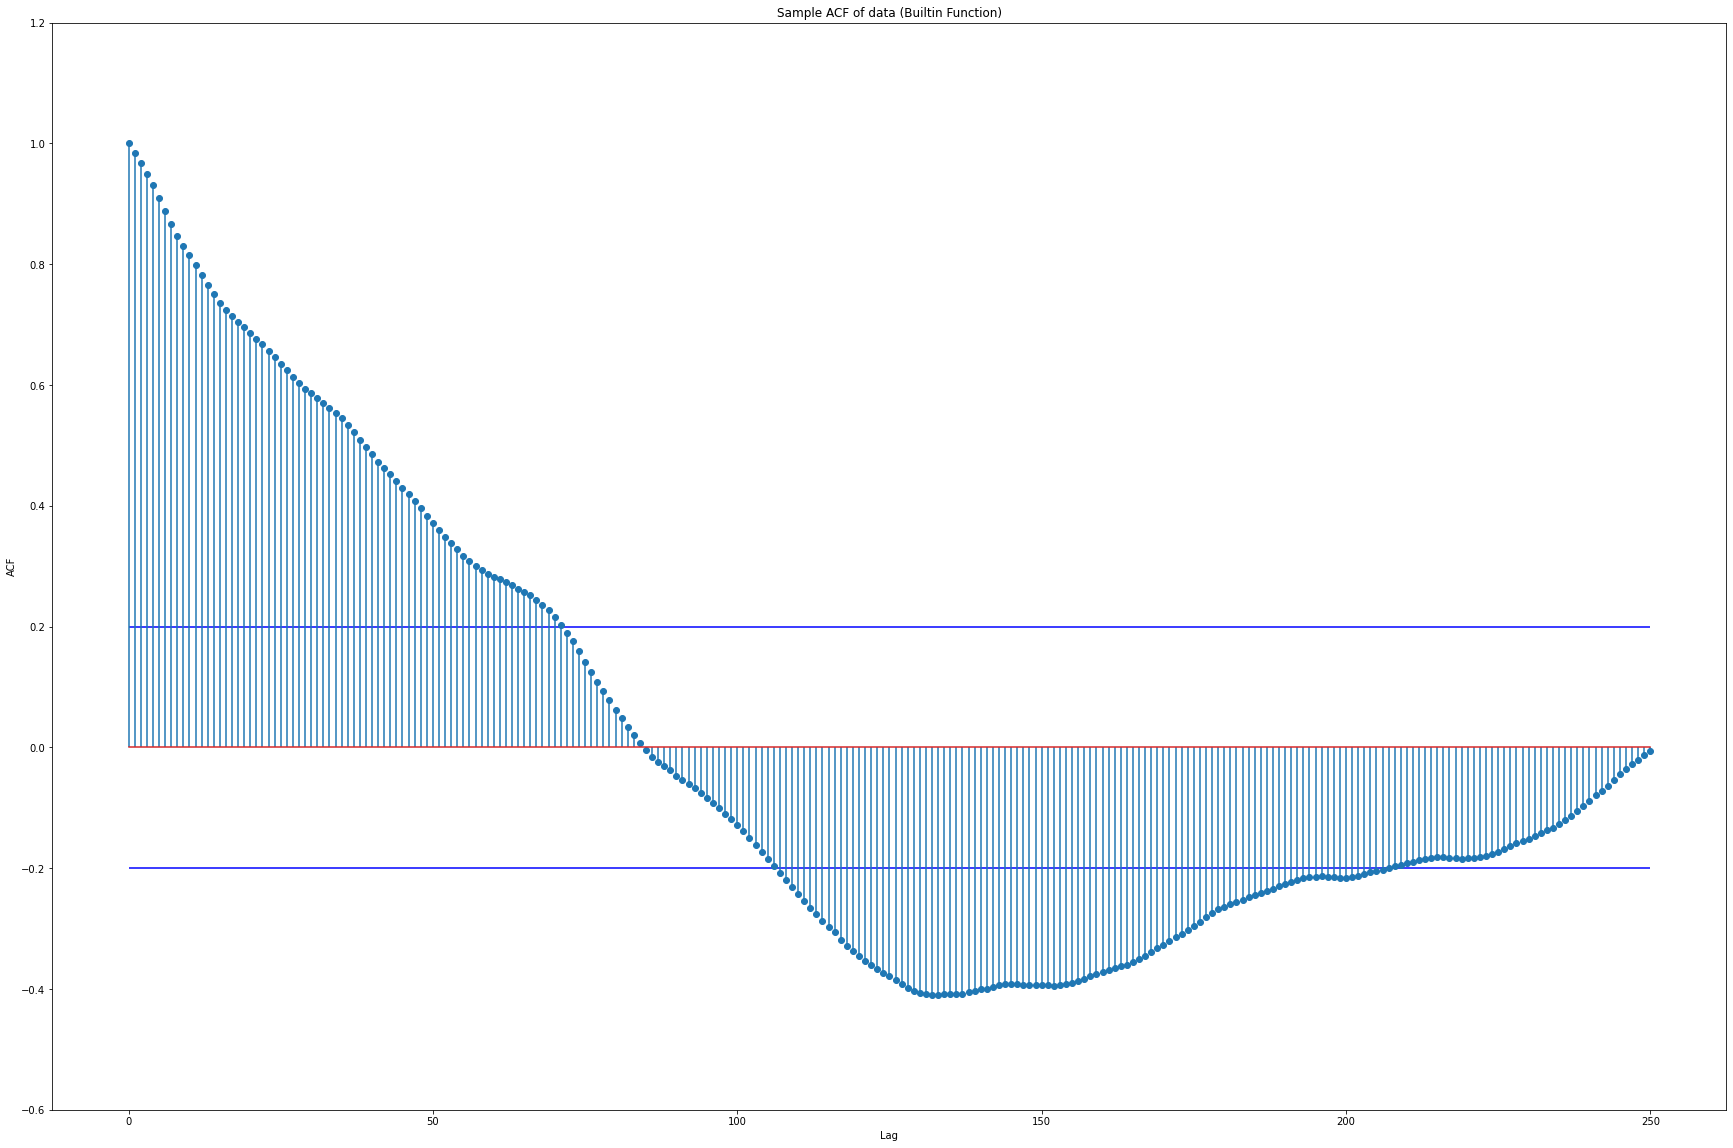

In [7]:
import statsmodels.tsa.stattools as tsas;

ACF = tsas.acf(Ariel, nlags=len(Ariel))
idx = range(len(ACF));
plt.figure(figsize=(30,20))
plt.hlines(-0.2, xmin=np.nanmin(idx), xmax=np.nanmax(idx),colors='blue')
plt.hlines( 0.2, xmin=np.nanmin(idx), xmax=np.nanmax(idx),colors='blue')
plt.stem(idx, ACF)
plt.ylim(-0.6, 1.2)
plt.xlabel("Lag")
plt.ylabel("ACF")
plt.title("Sample ACF of data (Builtin Function)")
plt.show()

## 3. Tách trend cho dữ liệu không có tính mùa

### 3.1. Code chung

In [8]:
from sklearn import linear_model
from argparse import ArgumentError

def NonSeasonalMovingAverageDetrend(data, q):
    n     = len(data);
    trend = np.ones(n) * np.nan;

    for i in range(q, n - q):
        trend[i] = float(np.nansum(data[i-q:i+q])) / (2*q + 1);
    return trend;


def NonSeasonalExponentialSmoothingDetrend(data, alpha):
    n     = len(data);
    trend = np.copy(data);

    for i in range(1, n):
        trend[i] = alpha * data[i] + (1 - alpha) * trend[i-1];
    return trend;


def NonSeasonalHoltWinterDetrend(data, alpha, beta):
    n         = len(data);
    delta     = np.zeros(n);
    trend     = np.copy(data);
    trend_exp = NonSeasonalExponentialSmoothingDetrend(data, alpha);
    
    for i in range(1, n):
        delta[i] = beta * (trend_exp[i] - trend_exp[i-1]) + (1 - beta) * delta[i-1];
    trend = trend_exp + delta;
    return trend;


def NonSeasonalFirstOrderRegressionDetrend(data):
    n      = len(data);
    X      = np.array(range(n));
    X_bar  = np.array([np.ones(n), X]).T
    
    weight = np.linalg.pinv(X_bar.T @ X_bar) @ X_bar.T @ data.T


    # print(weight)
    # plt.plot(X, data)
    # plt.plot(X, weight[0, 0] + X * weight[1, 0])


    # regr = linear_model.LinearRegression(fit_intercept=False);
    # regr.fit(X_bar, data)
    # weight2 = regr.coef_;
    # print(weight2)
    # plt.plot(X, weight2[0, 0] + X * weight2[0, 1])

    trend = weight[0] + X * weight[1];
    return trend;

def NonSeasonalDetrend(
    data, 
    computational_method, 
    q               = None, 
    alpha           = None, 
    beta            = None
):  
    trend = [];
    if(computational_method == 'MA'):
        trend = NonSeasonalMovingAverageDetrend(data, q);
    elif(computational_method == 'Exponential'):
        trend = NonSeasonalExponentialSmoothingDetrend(data, alpha);
    elif(computational_method == 'HoltWinter'):
        trend = NonSeasonalHoltWinterDetrend(data, alpha, beta);
    elif(computational_method == '1stOrderRegression'):
        trend = NonSeasonalFirstOrderRegressionDetrend(data);
    else:
        raise ArgumentError;
    return np.ndarray.flatten(trend);



idx   = np.array(range(len(Ariel)));

### 3.2. MA(q) với q = 77

#### Tính trend

Text(0.5, 1.0, 'Trend Estimation: MA(q), q = 77')

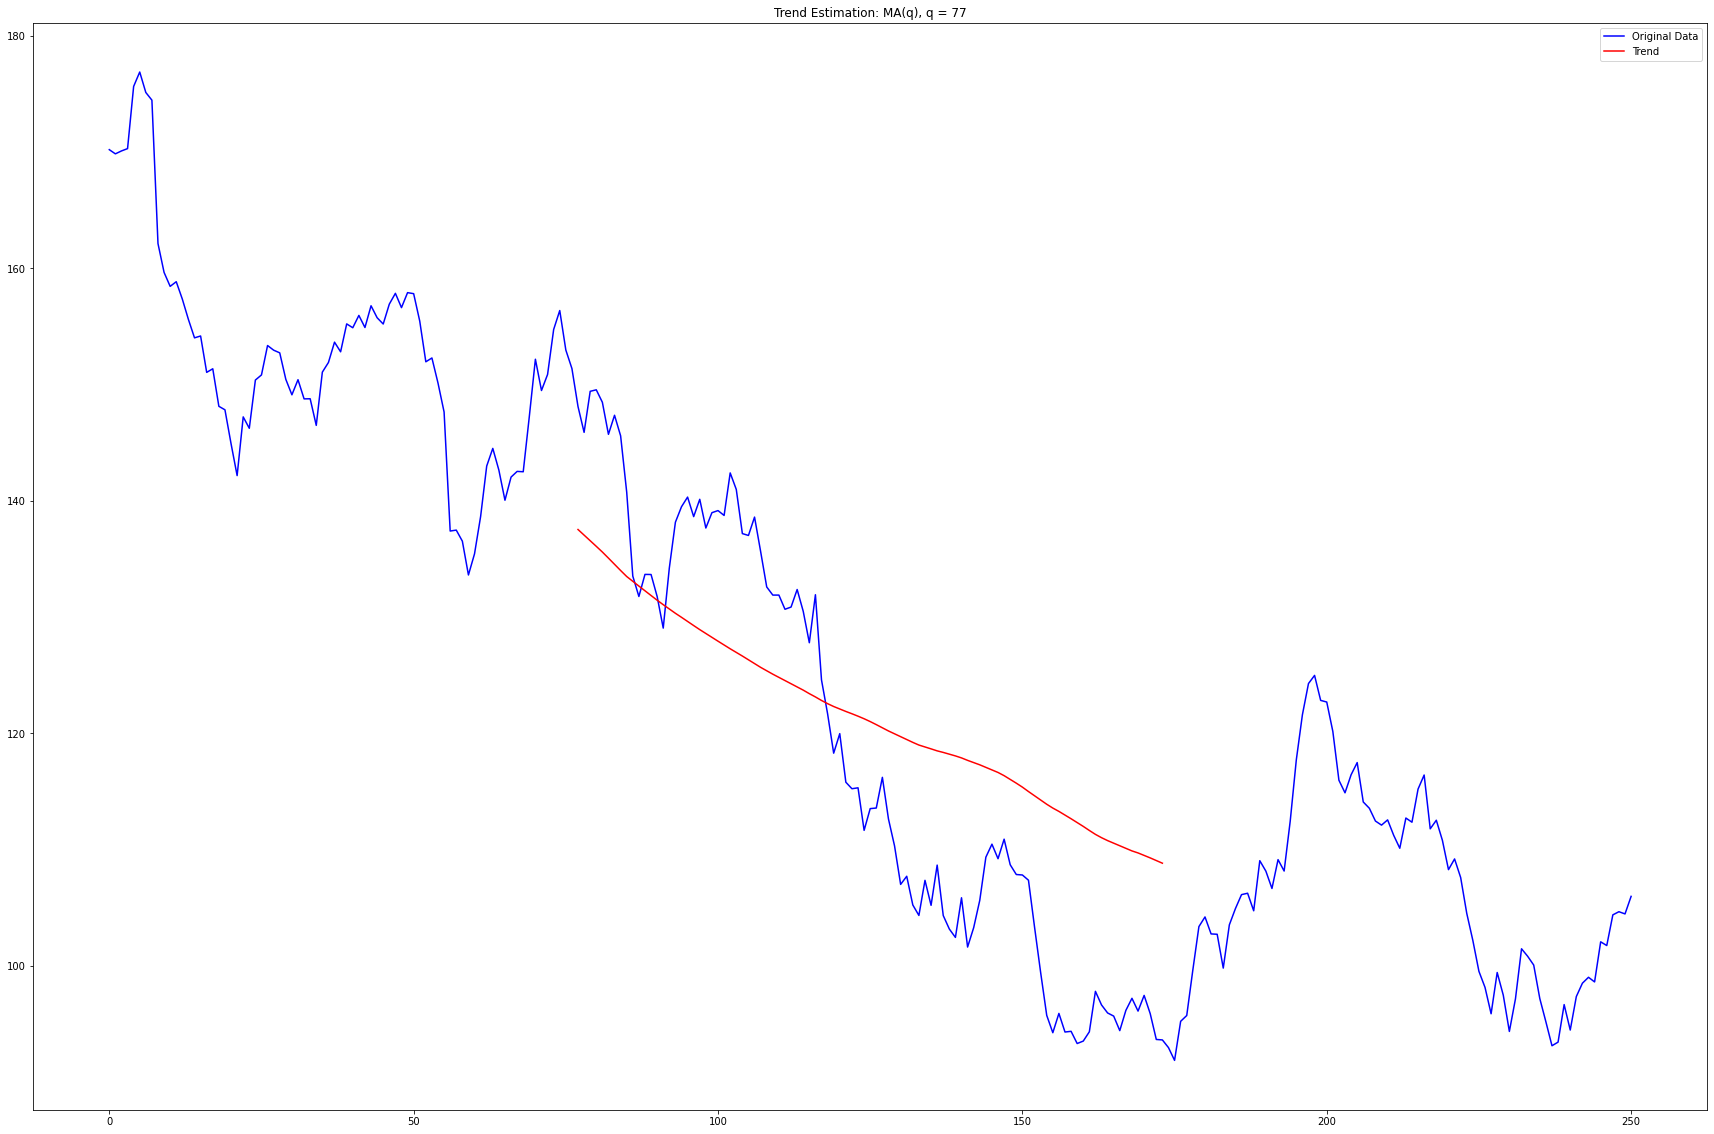

In [9]:
# Tính trend
Cindy = NonSeasonalDetrend(Ariel, 'MA', q = 77)
plt.figure(figsize=(30,20))
plt.plot(idx, Ariel, color = 'blue')
plt.plot(idx, Cindy, color = 'red')
plt.legend(["Original Data", "Trend"])
plt.title("Trend Estimation: MA(q), q = 77")

#### Tách trend

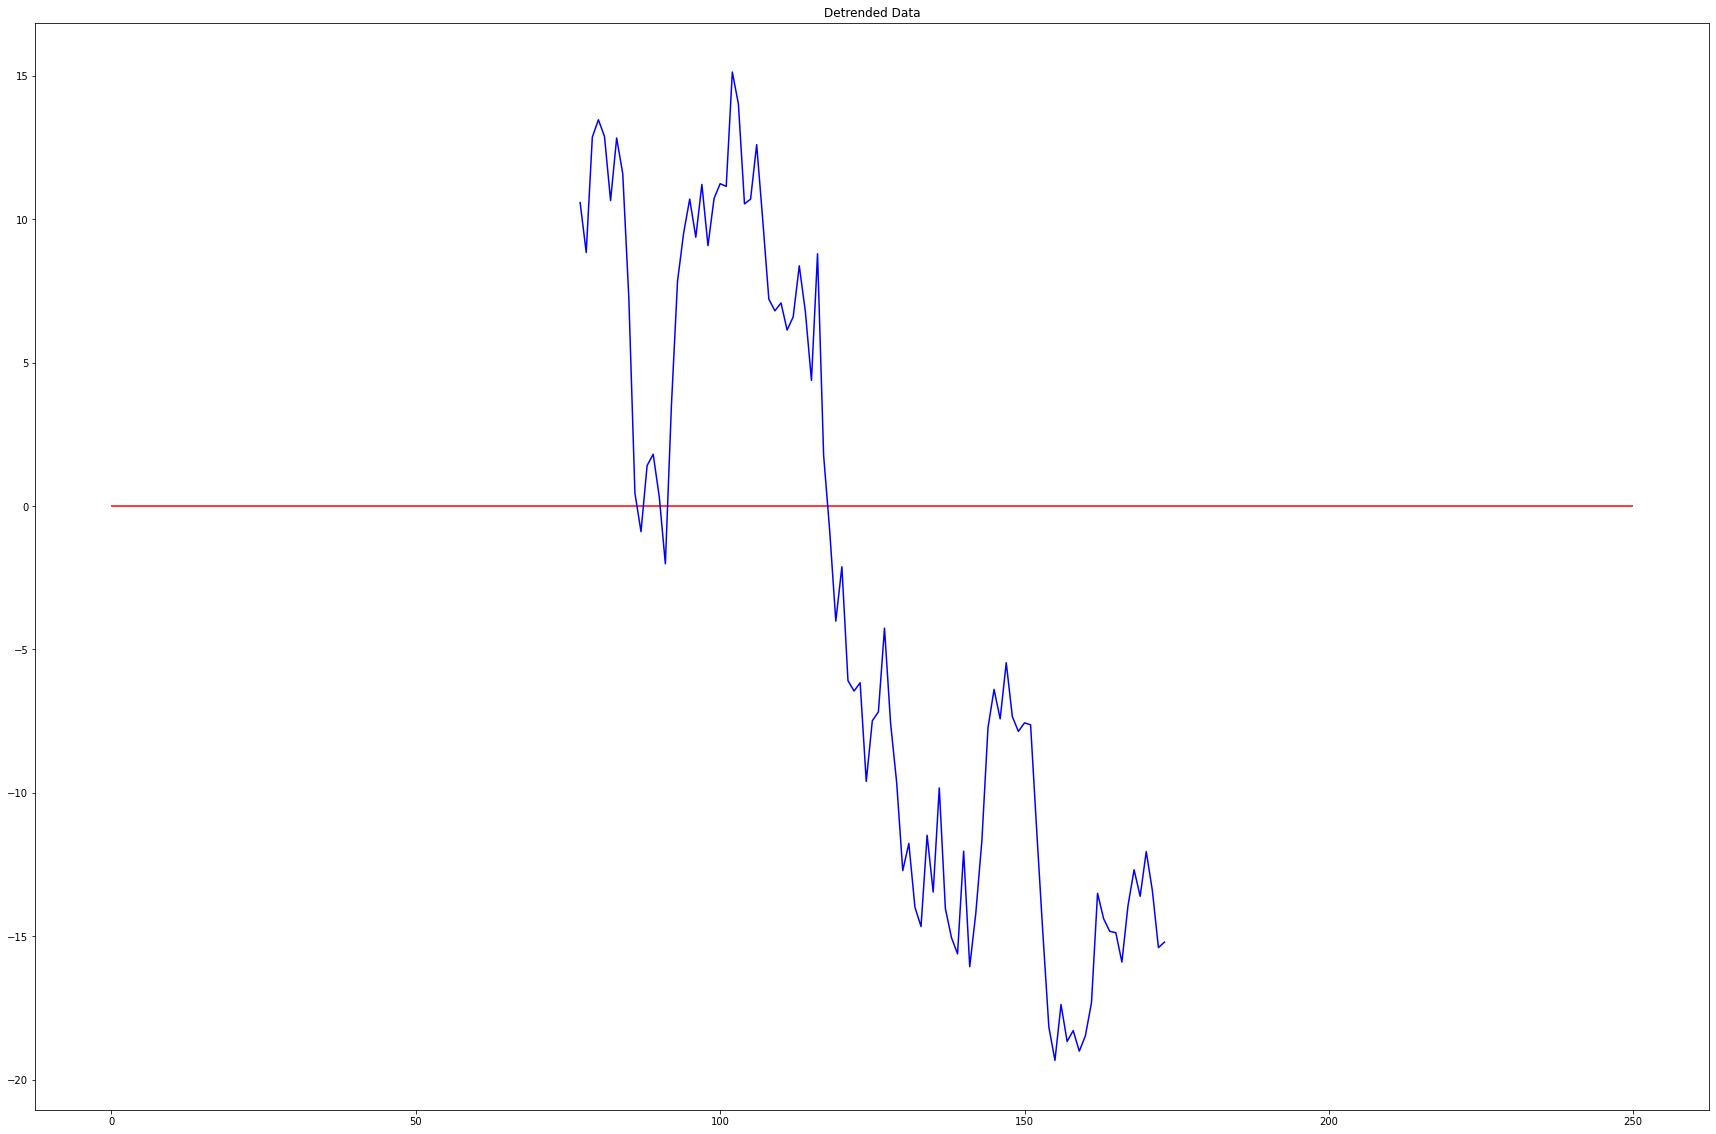

In [10]:
# Tách trend
Belle = Ariel - Cindy;
plt.figure(figsize=(30,20))
plt.plot(idx, Belle, color = 'blue')
plt.hlines(0, xmin=np.nanmin(idx), xmax=np.nanmax(idx), colors='red')
plt.title("Detrended Data")
plt.show()

In [23]:
Ariel.shape

(251,)

#### Phân tích ACF

100%|██████████| 252/252 [00:00<00:00, 4584.95it/s]


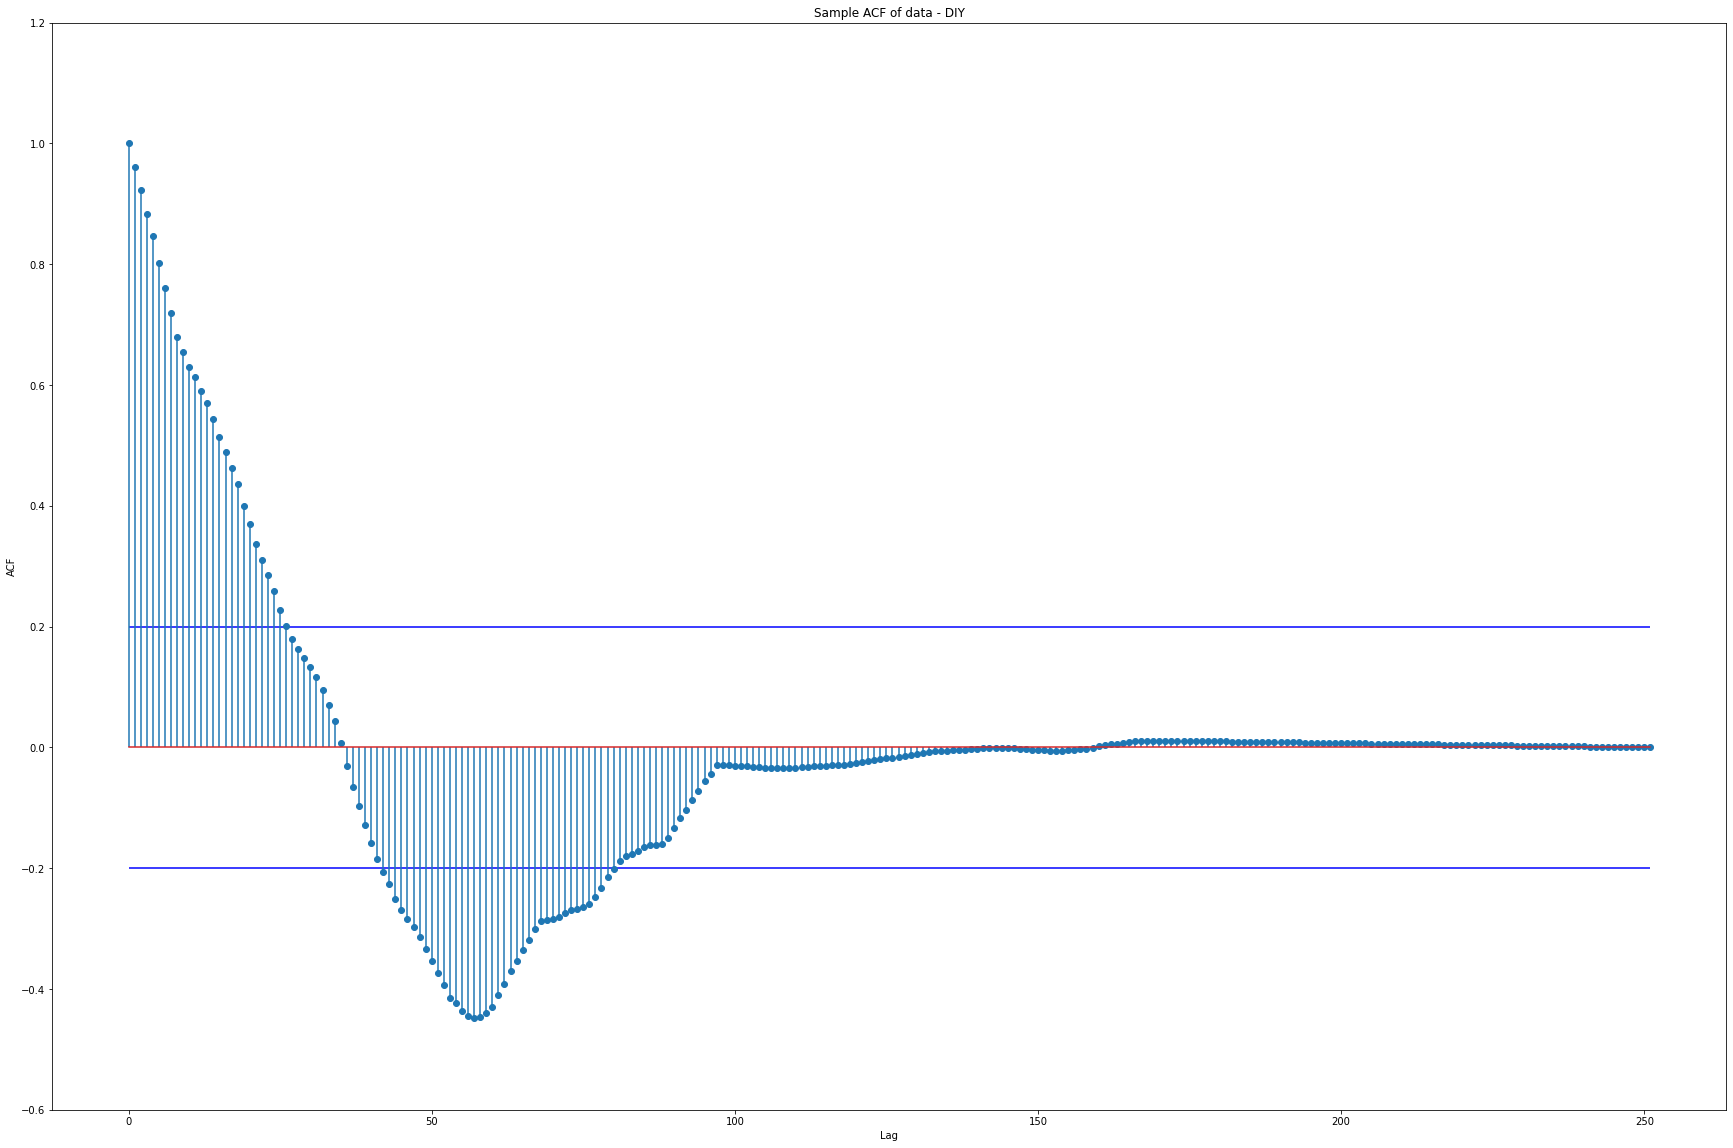

In [11]:
# ACF
sampleACF_Analysis(np.nan_to_num(Belle))

### 3.3. Exponential Smoothing với $\alpha$ = 0.4

#### Tính trend

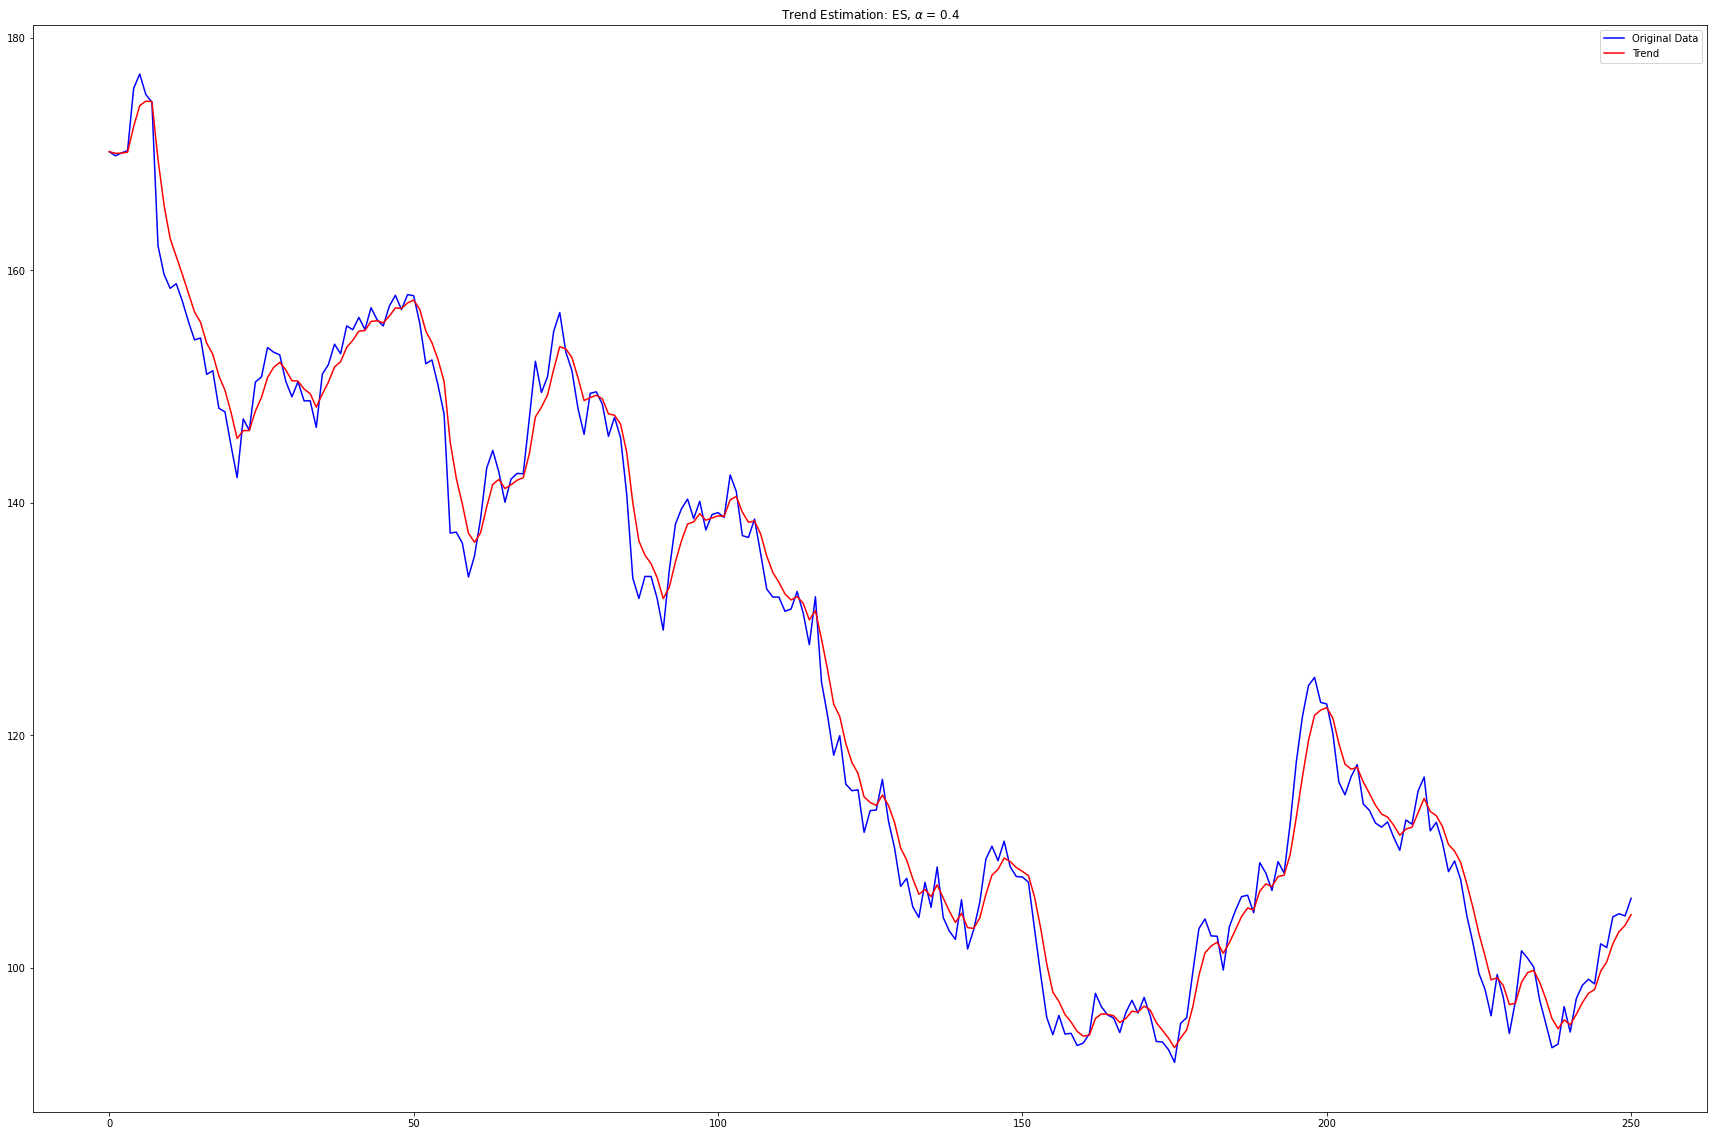

In [12]:
# Tính trend
Cindy = NonSeasonalDetrend(Ariel, 'Exponential', alpha=0.4)
plt.figure(figsize=(30,20))
plt.plot(idx, Ariel, color = 'blue')
plt.plot(idx, Cindy, color = 'red')
plt.legend(["Original Data", "Trend"])
plt.title("Trend Estimation: ES, $\\alpha$ = 0.4")
plt.show()

#### Tách trend

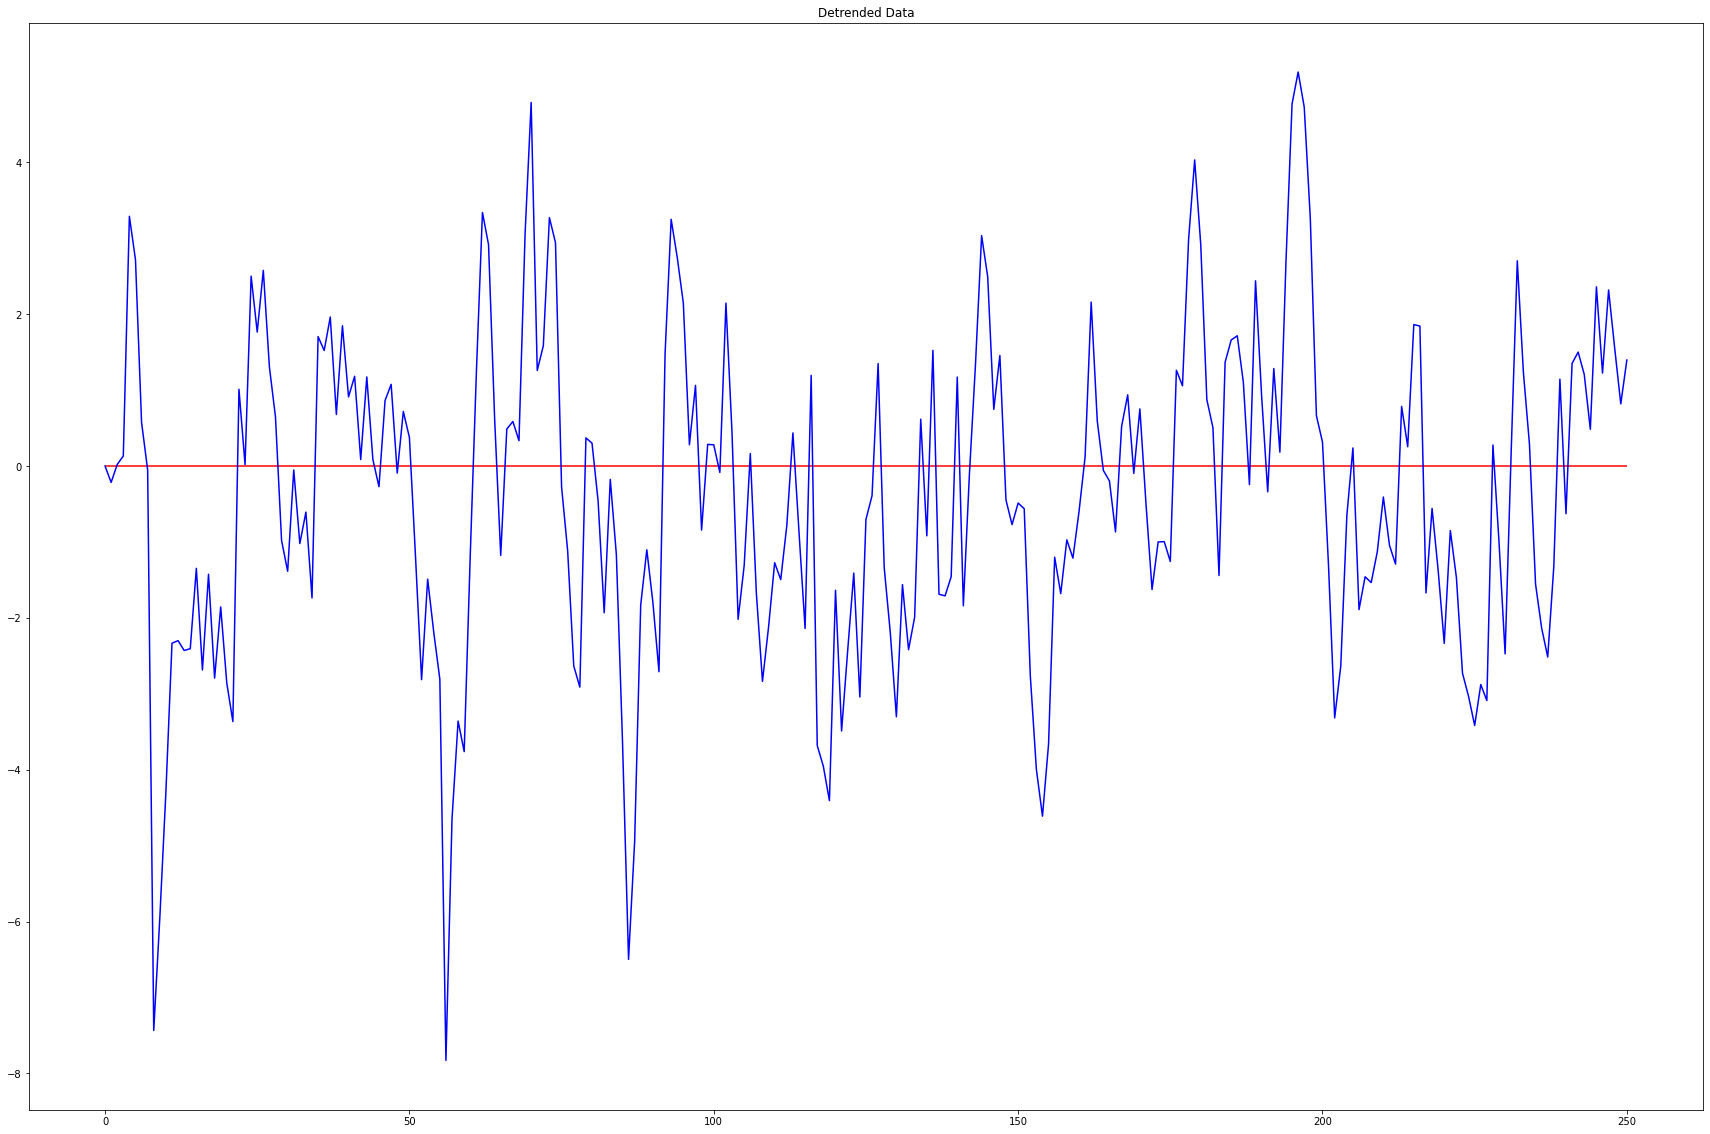

In [13]:
# Tách trend
Belle = Ariel - Cindy;
plt.figure(figsize=(30,20))
plt.plot(idx, Belle, color = 'blue')
plt.hlines(0, xmin=np.nanmin(idx), xmax=np.nanmax(idx), colors='red')
plt.title("Detrended Data")
plt.show()

#### Phân tích ACF

100%|██████████| 252/252 [00:00<00:00, 4492.18it/s]


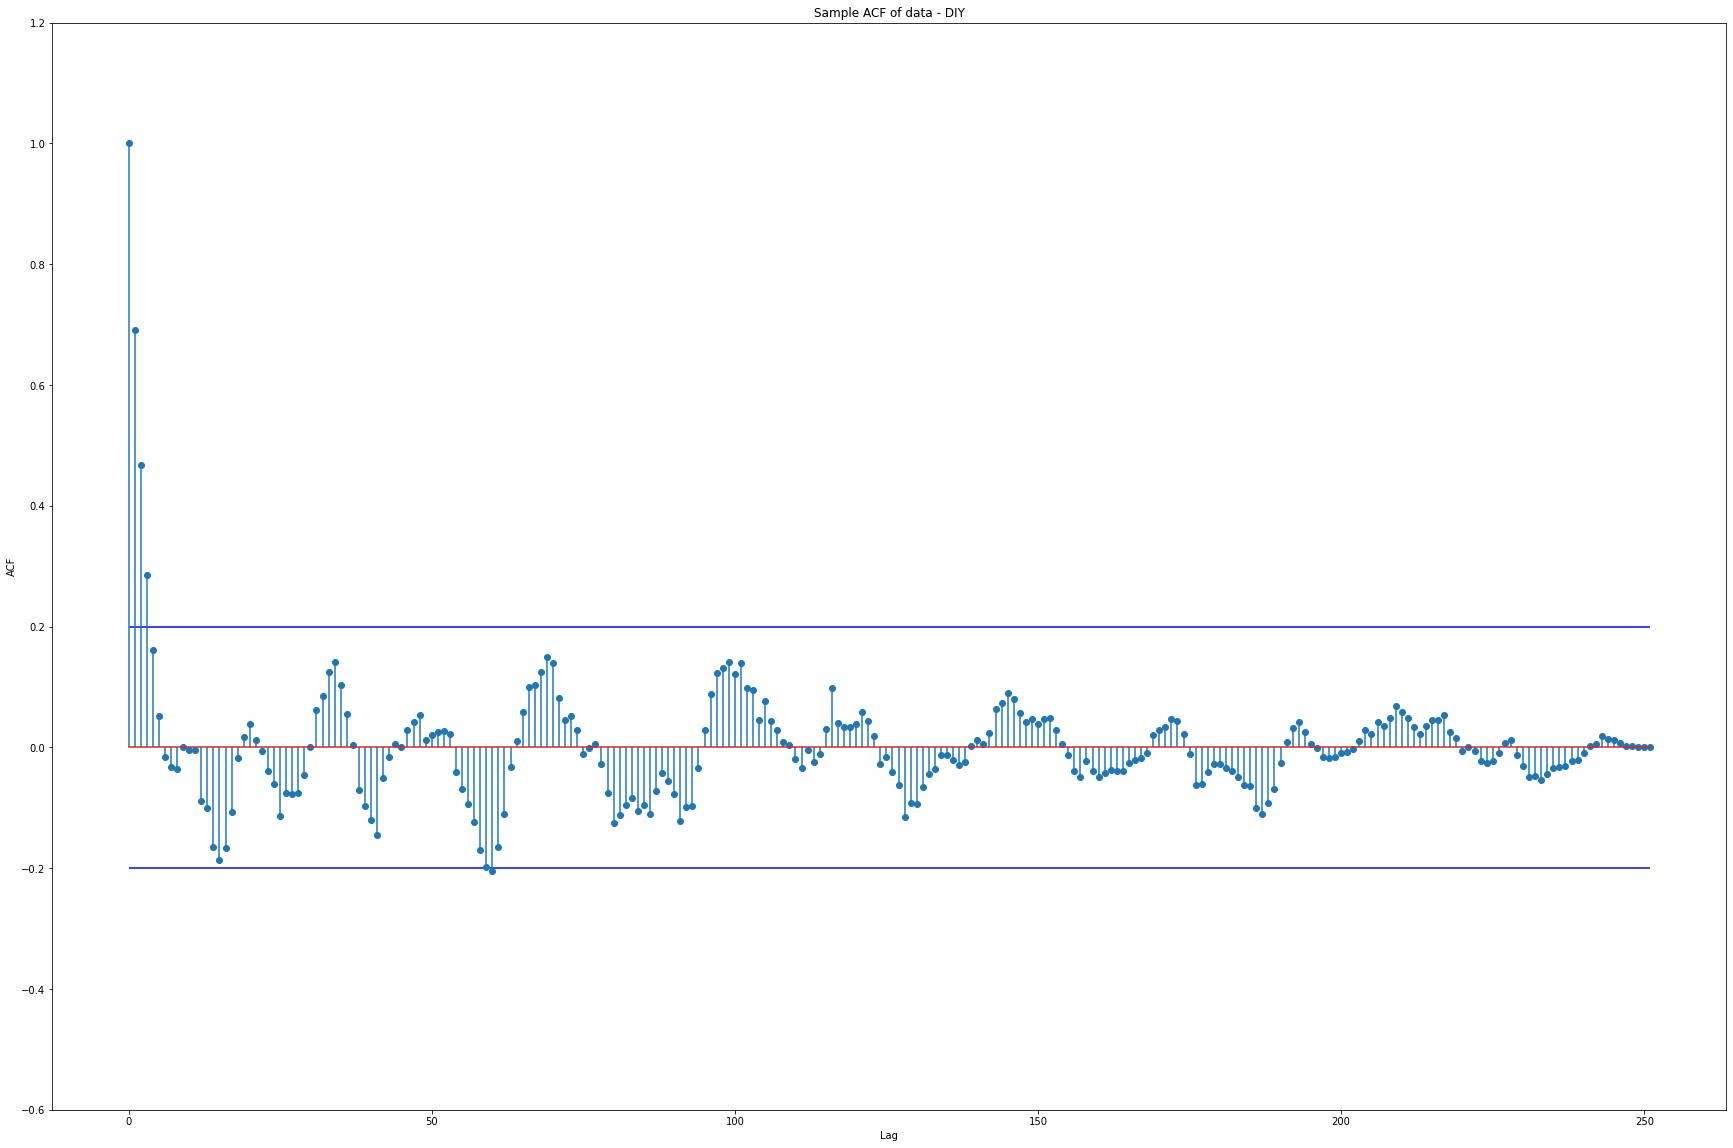

In [14]:
# ACF
sampleACF_Analysis(np.nan_to_num(Belle))

### 3.4. Holt-Winter với $\alpha$ = 0.4, $\beta$ = 0.6

#### Tính trend

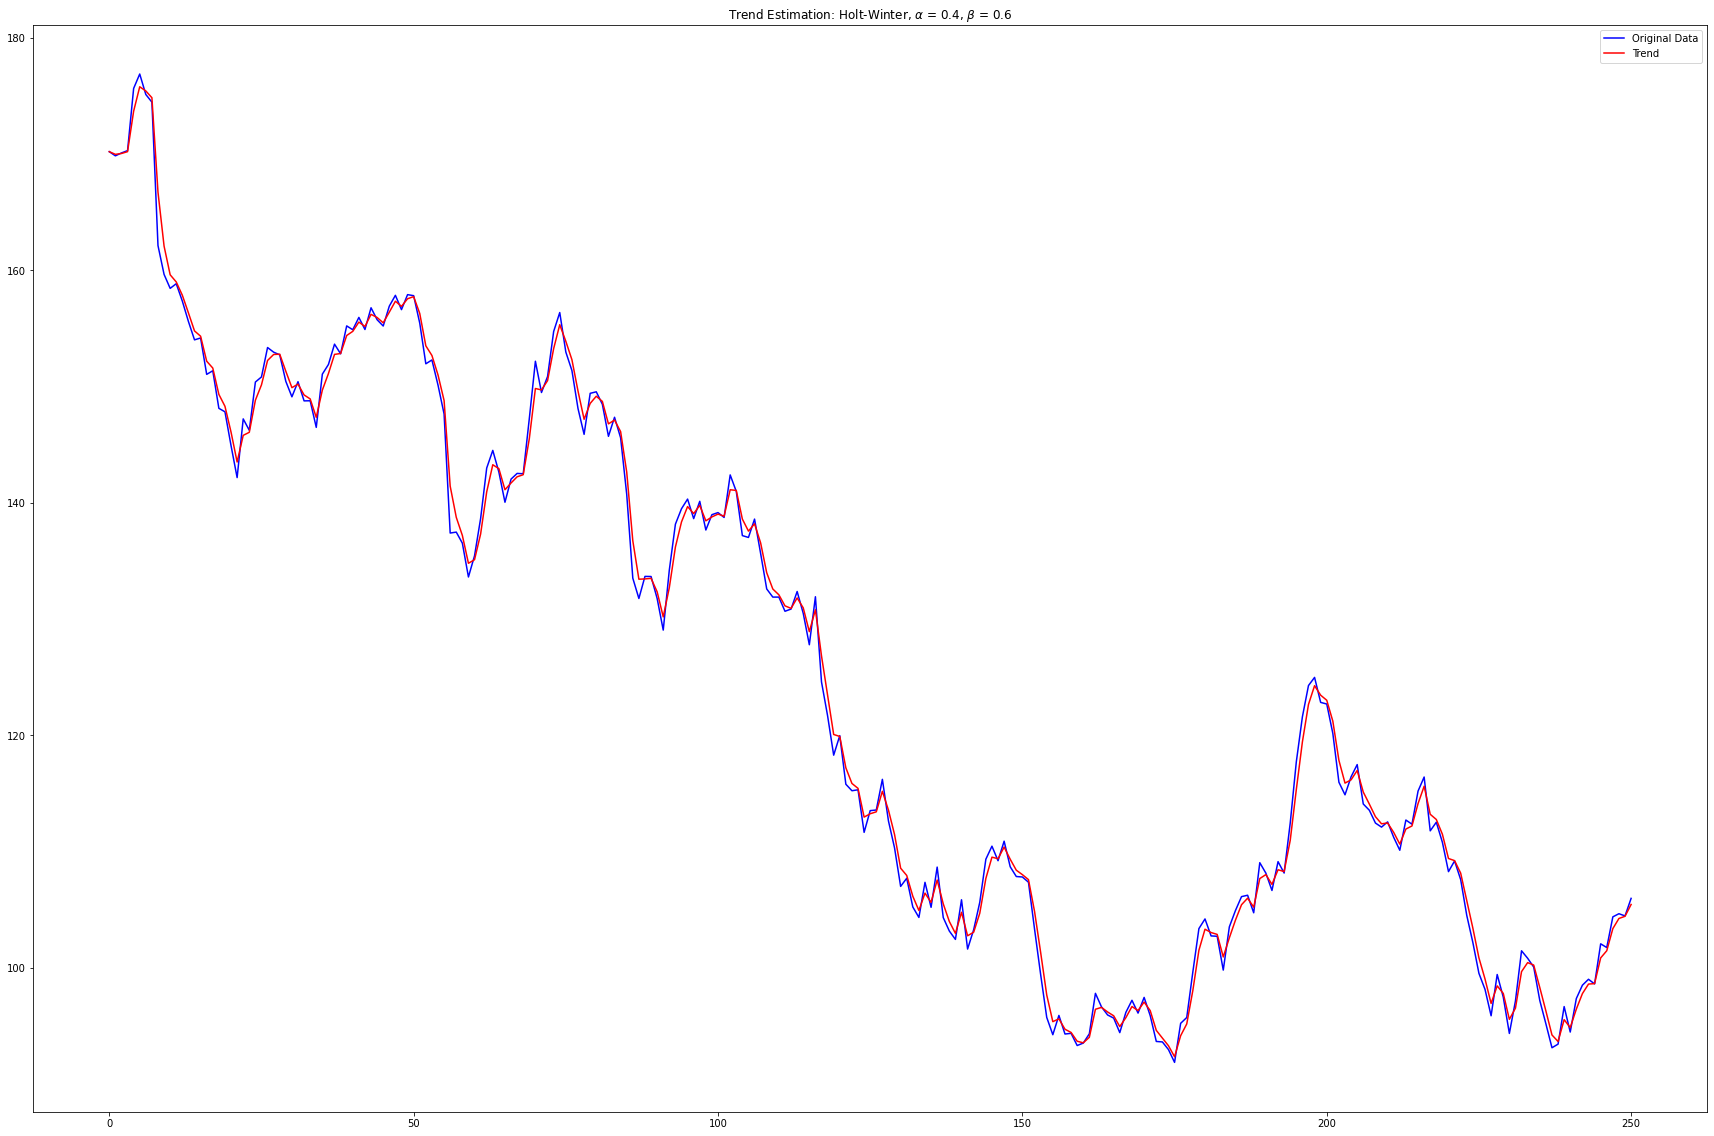

In [15]:
# Tính trend
Cindy = NonSeasonalDetrend(Ariel, 'HoltWinter', alpha=0.4, beta=0.6)
plt.figure(figsize=(30,20))
plt.plot(idx, Ariel, color = 'blue')
plt.plot(idx, Cindy, color = 'red')
plt.legend(["Original Data", "Trend"])
plt.title("Trend Estimation: Holt-Winter, $\\alpha$ = 0.4, $\\beta$ = 0.6")
plt.show()

#### Tách trend

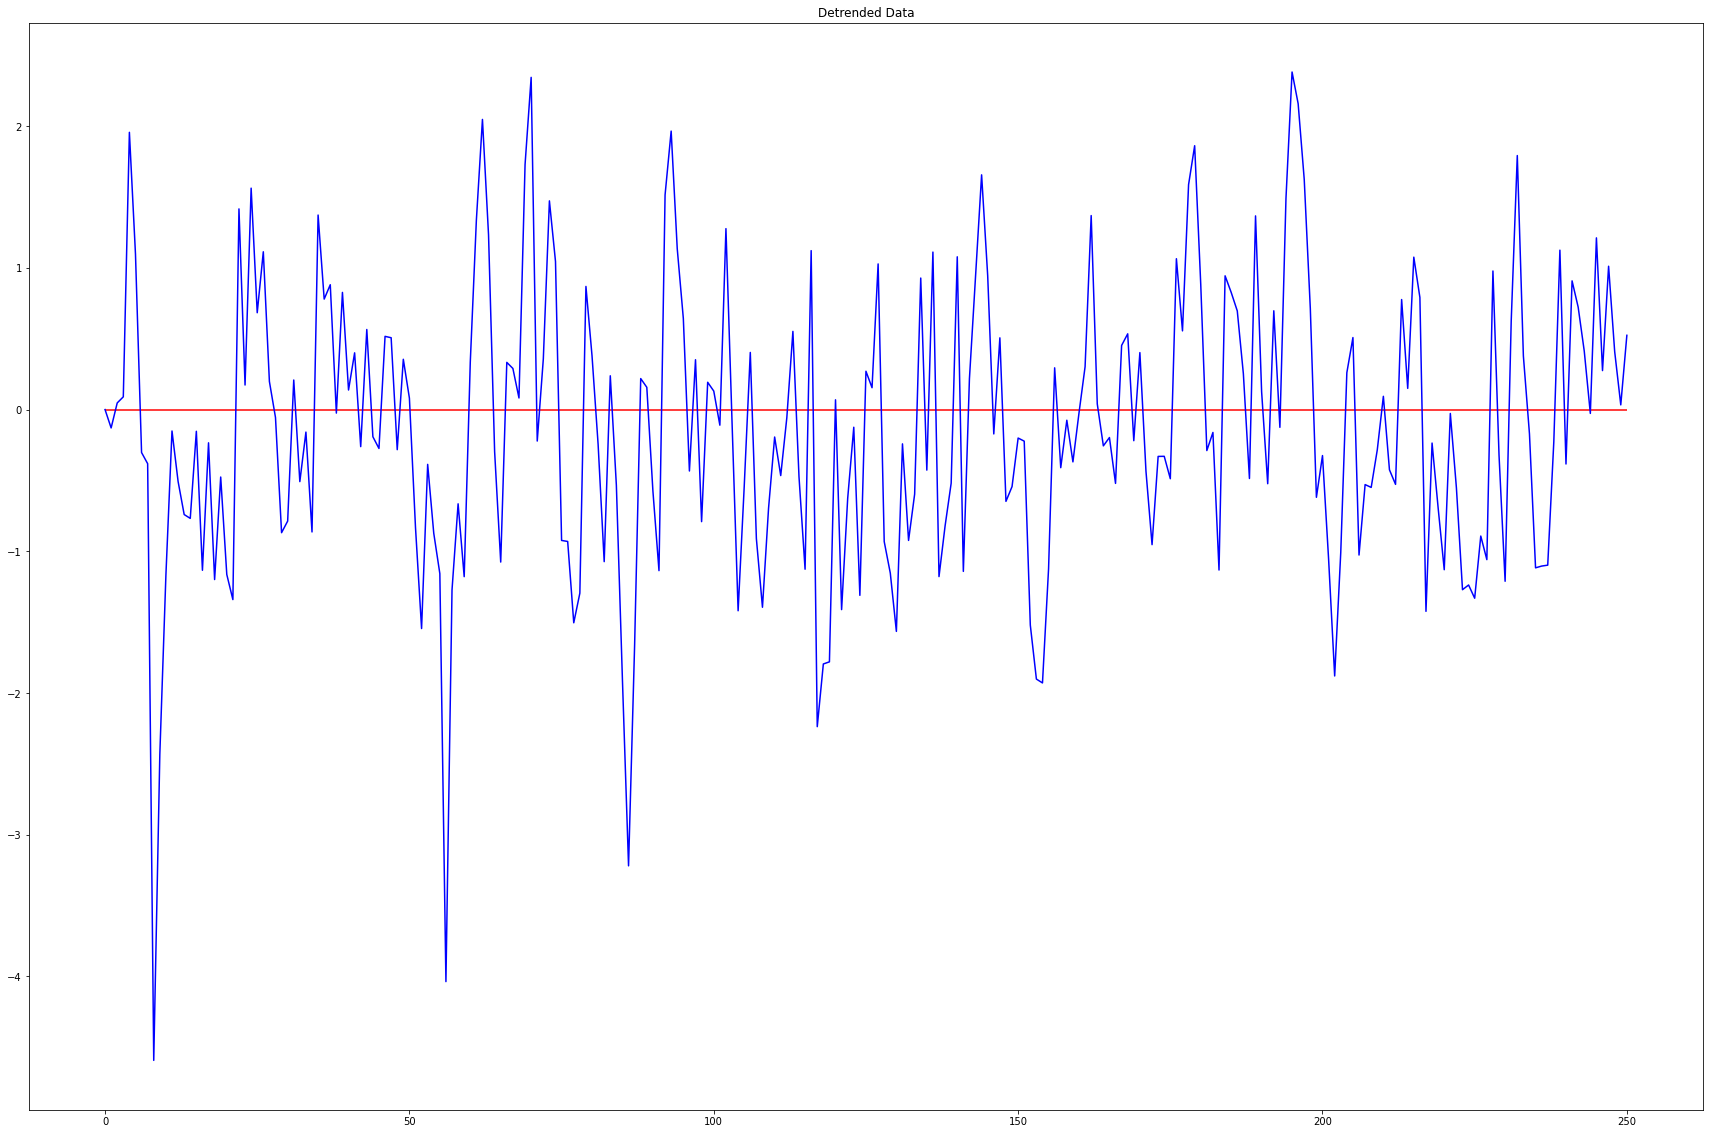

In [16]:
# Tách trend
Belle = Ariel - Cindy;
plt.figure(figsize=(30,20))
plt.plot(idx, Belle, color = 'blue')
plt.hlines(0, xmin=np.nanmin(idx), xmax=np.nanmax(idx), colors='red')
plt.title("Detrended Data")
plt.show()

#### Phân tích ACF

100%|██████████| 252/252 [00:00<00:00, 4533.45it/s]


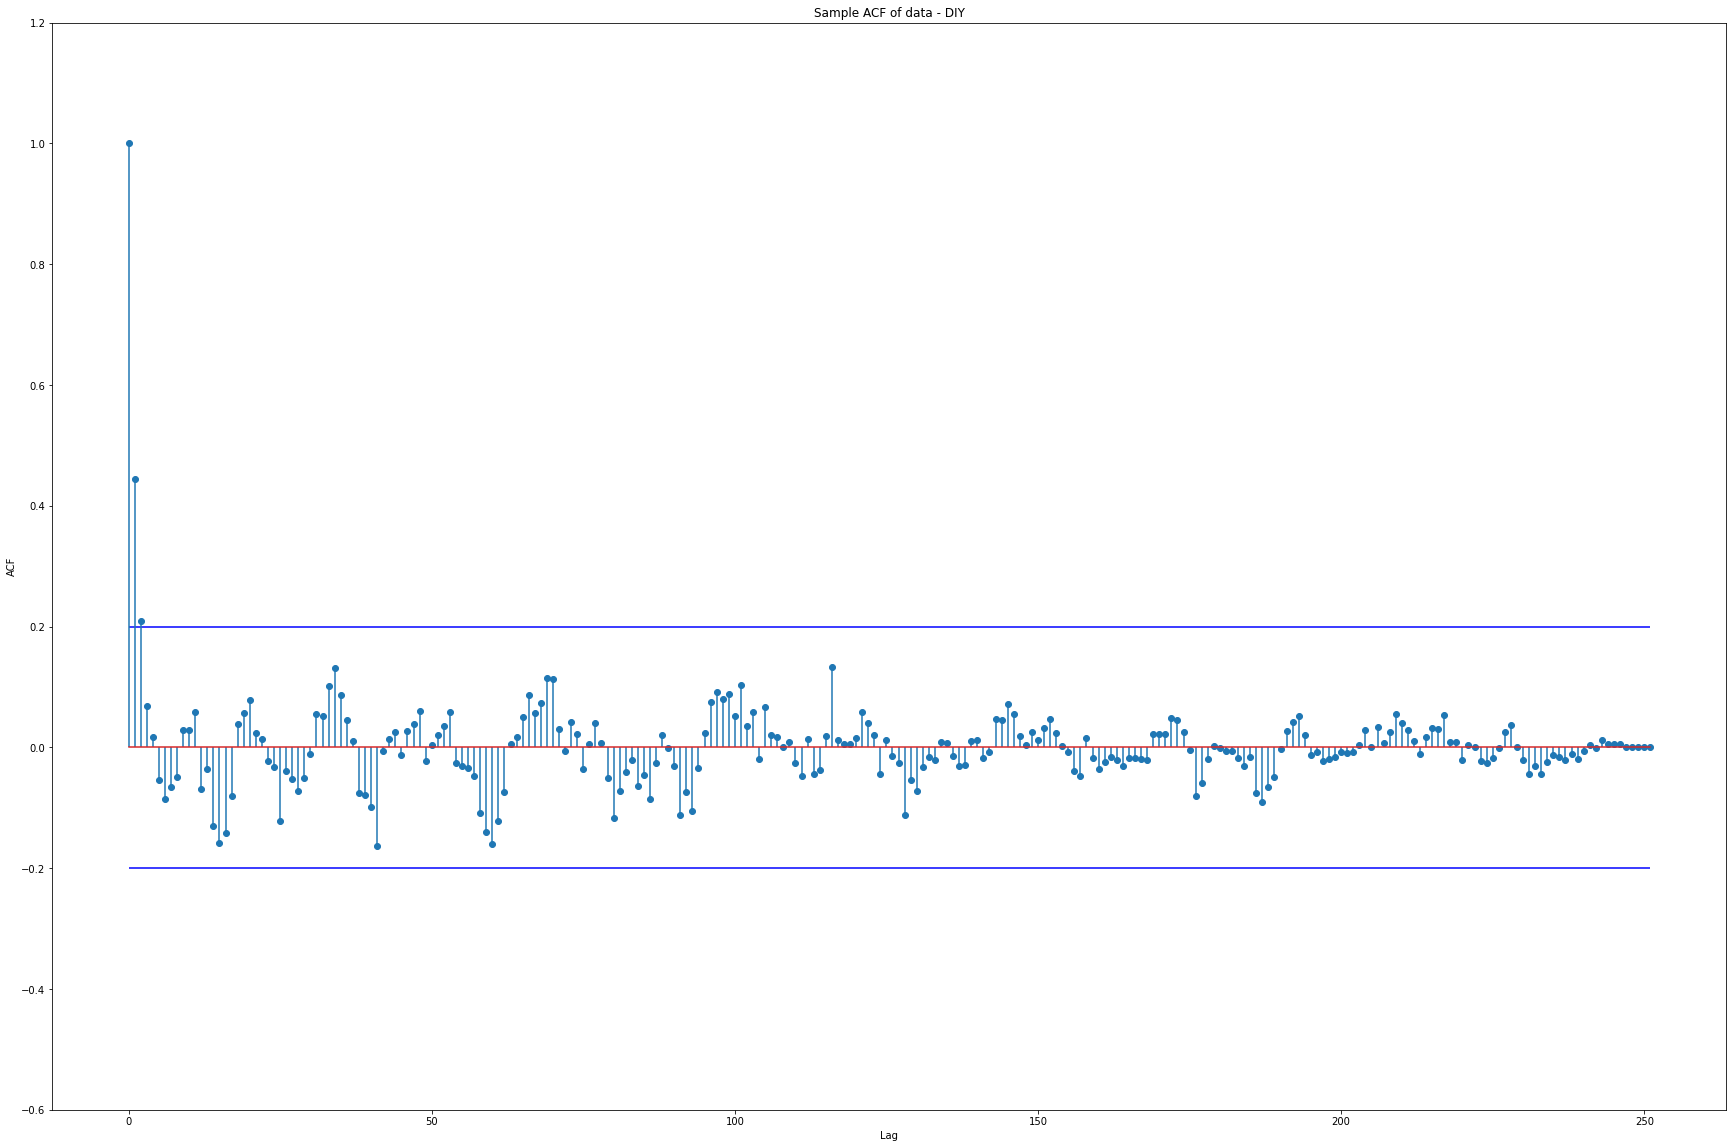

In [17]:
# ACF
sampleACF_Analysis(np.nan_to_num(Belle))

### 3.5. Hồi quy bậc 1

#### Tính trend

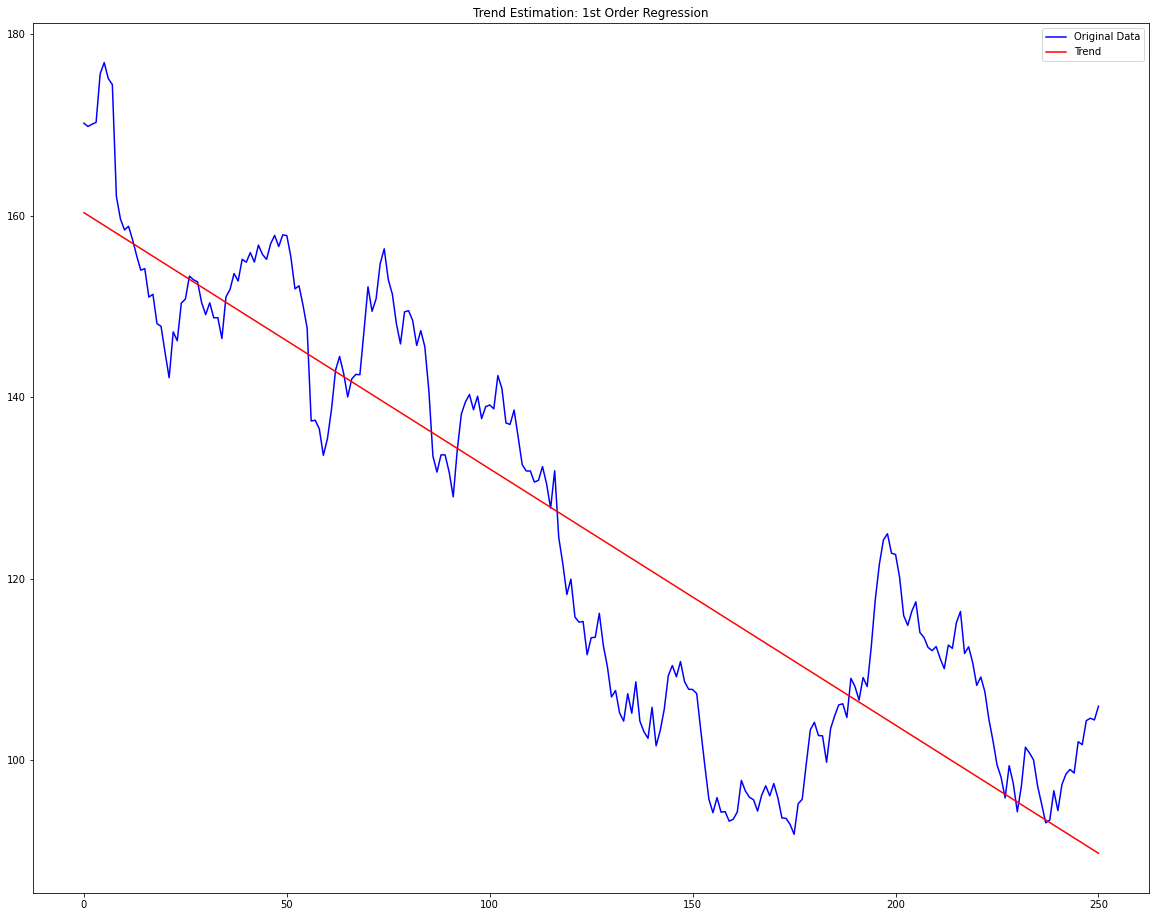

In [27]:
# Tính trend
Cindy = NonSeasonalDetrend(Ariel, '1stOrderRegression')
plt.figure(figsize=(20,16))
plt.plot(idx, Ariel, color = 'blue')
plt.plot(idx, Cindy, color = 'red')
plt.legend(["Original Data", "Trend"])
plt.title("Trend Estimation: 1st Order Regression")
plt.show()

#### Tách trend

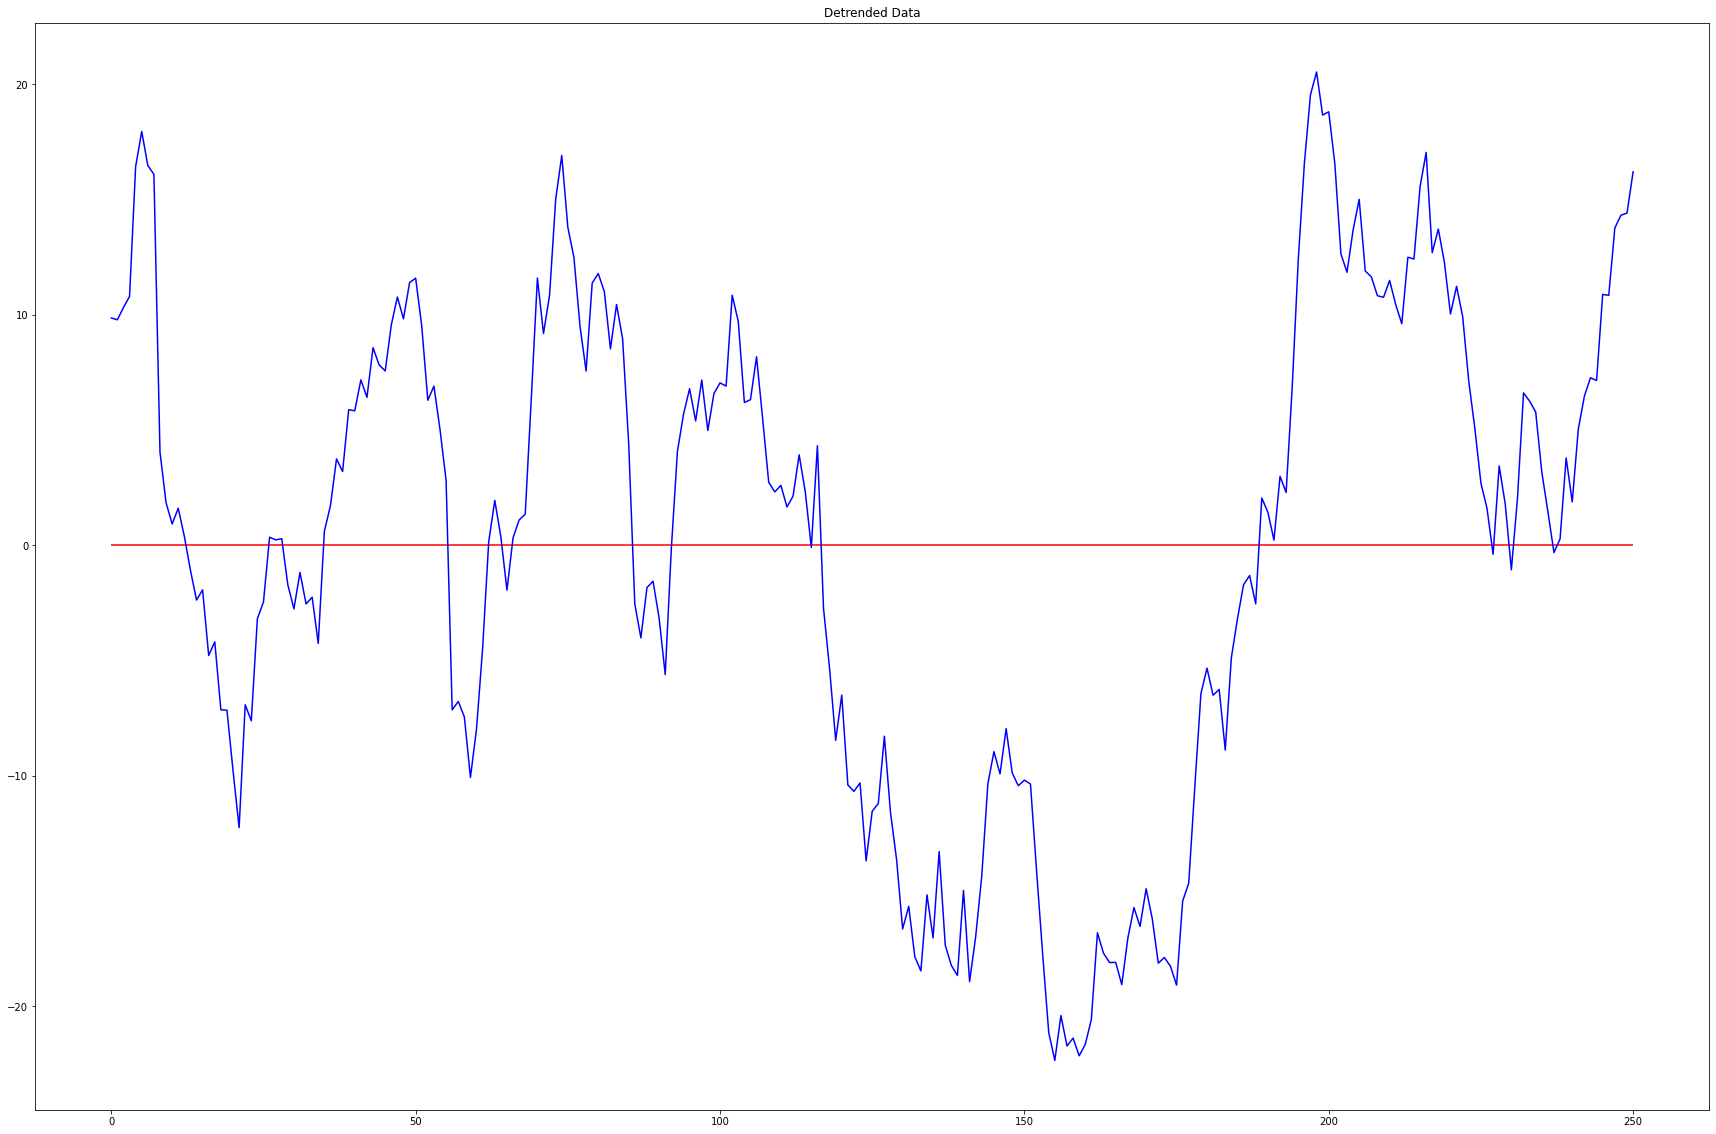

In [19]:
Belle = Ariel - Cindy;
plt.figure(figsize=(30,20))
plt.plot(idx, Belle, color = 'blue')
plt.hlines(0, xmin=np.nanmin(idx), xmax=np.nanmax(idx), colors='red')
plt.title("Detrended Data")
plt.show()

In [38]:
Cindy

array([160.33268434, 160.05035625, 159.76802816, 159.48570007,
       159.20337198, 158.9210439 , 158.63871581, 158.35638772,
       158.07405963, 157.79173154, 157.50940345, 157.22707536,
       156.94474728, 156.66241919, 156.3800911 , 156.09776301,
       155.81543492, 155.53310683, 155.25077874, 154.96845066,
       154.68612257, 154.40379448, 154.12146639, 153.8391383 ,
       153.55681021, 153.27448212, 152.99215404, 152.70982595,
       152.42749786, 152.14516977, 151.86284168, 151.58051359,
       151.2981855 , 151.01585742, 150.73352933, 150.45120124,
       150.16887315, 149.88654506, 149.60421697, 149.32188888,
       149.0395608 , 148.75723271, 148.47490462, 148.19257653,
       147.91024844, 147.62792035, 147.34559226, 147.06326418,
       146.78093609, 146.498608  , 146.21627991, 145.93395182,
       145.65162373, 145.36929564, 145.08696756, 144.80463947,
       144.52231138, 144.23998329, 143.9576552 , 143.67532711,
       143.39299902, 143.11067094, 142.82834285, 142.54

#### Phân tích ACF

In [36]:
Belle

array([  9.85731766,   9.77964575,  10.31197384,  10.79429893,
        16.42663302,  17.9489511 ,  16.47128519,  16.09360928,
         4.03594137,   1.83827346,   0.92058955,   1.60292664,
         0.38525472,  -1.08241719,  -2.3800911 ,  -1.93775901,
        -4.78543592,  -4.19311083,  -7.14077774,  -7.15845266,
        -9.78612857, -12.25380048,  -6.92146939,  -7.6191373 ,
        -3.18681521,  -2.46448412,   0.34784196,   0.23017605,
         0.28250914,  -1.71517677,  -2.76283568,  -1.18051959,
        -2.5481855 ,  -2.25586242,  -4.26352833,   0.59880176,
         1.71113185,   3.74345994,   3.19578603,   5.87810812,
         5.8304342 ,   7.17276029,   6.41509438,   8.56741847,
         7.81974756,   7.56208165,   9.55440174,  10.76673782,
         9.81906991,  11.391391  ,  11.58372309,   9.50605018,
         6.28837827,   6.90070836,   5.02303344,   2.81535553,
        -7.14230638,  -6.77997629,  -7.4476602 , -10.07532111,
        -7.97300102,  -4.48066594,   0.14165815,   1.94

100%|██████████| 252/252 [00:00<00:00, 4746.75it/s]


[1.0, 0.9650778287310859, 0.9246529278343251, 0.8786398326888392, 0.8316382841528616, 0.7823510459912705, 0.7345197489956881, 0.6924759345868958, 0.6520825760885205, 0.6189911990371907, 0.5847483527836334, 0.5526290383424173, 0.5139869555754177, 0.4838121196955836, 0.45266373393574555, 0.42669572760072927, 0.40563377000115575, 0.3895622011391678, 0.3769587296242828, 0.36182077549854846, 0.3478633946424608, 0.33243769173255866, 0.31672558558833996, 0.297494655756808, 0.28193633240566146, 0.2629720940431987, 0.2511068644325506, 0.23598058825514526, 0.22132714724320748, 0.20838837470548158, 0.19722255025377672, 0.18802504946187018, 0.17360809751698764, 0.15850896471135179, 0.14020955124081147, 0.11435278259853371, 0.08514741970390154, 0.05604697887755567, 0.024702937611341756, -0.0007052845859869515, -0.025383059425075714, -0.048694743963586806, -0.0618259799538242, -0.07776252530721992, -0.0952562325695403, -0.11455950923455394, -0.13322004607881607, -0.15331251225428524, -0.173736341922

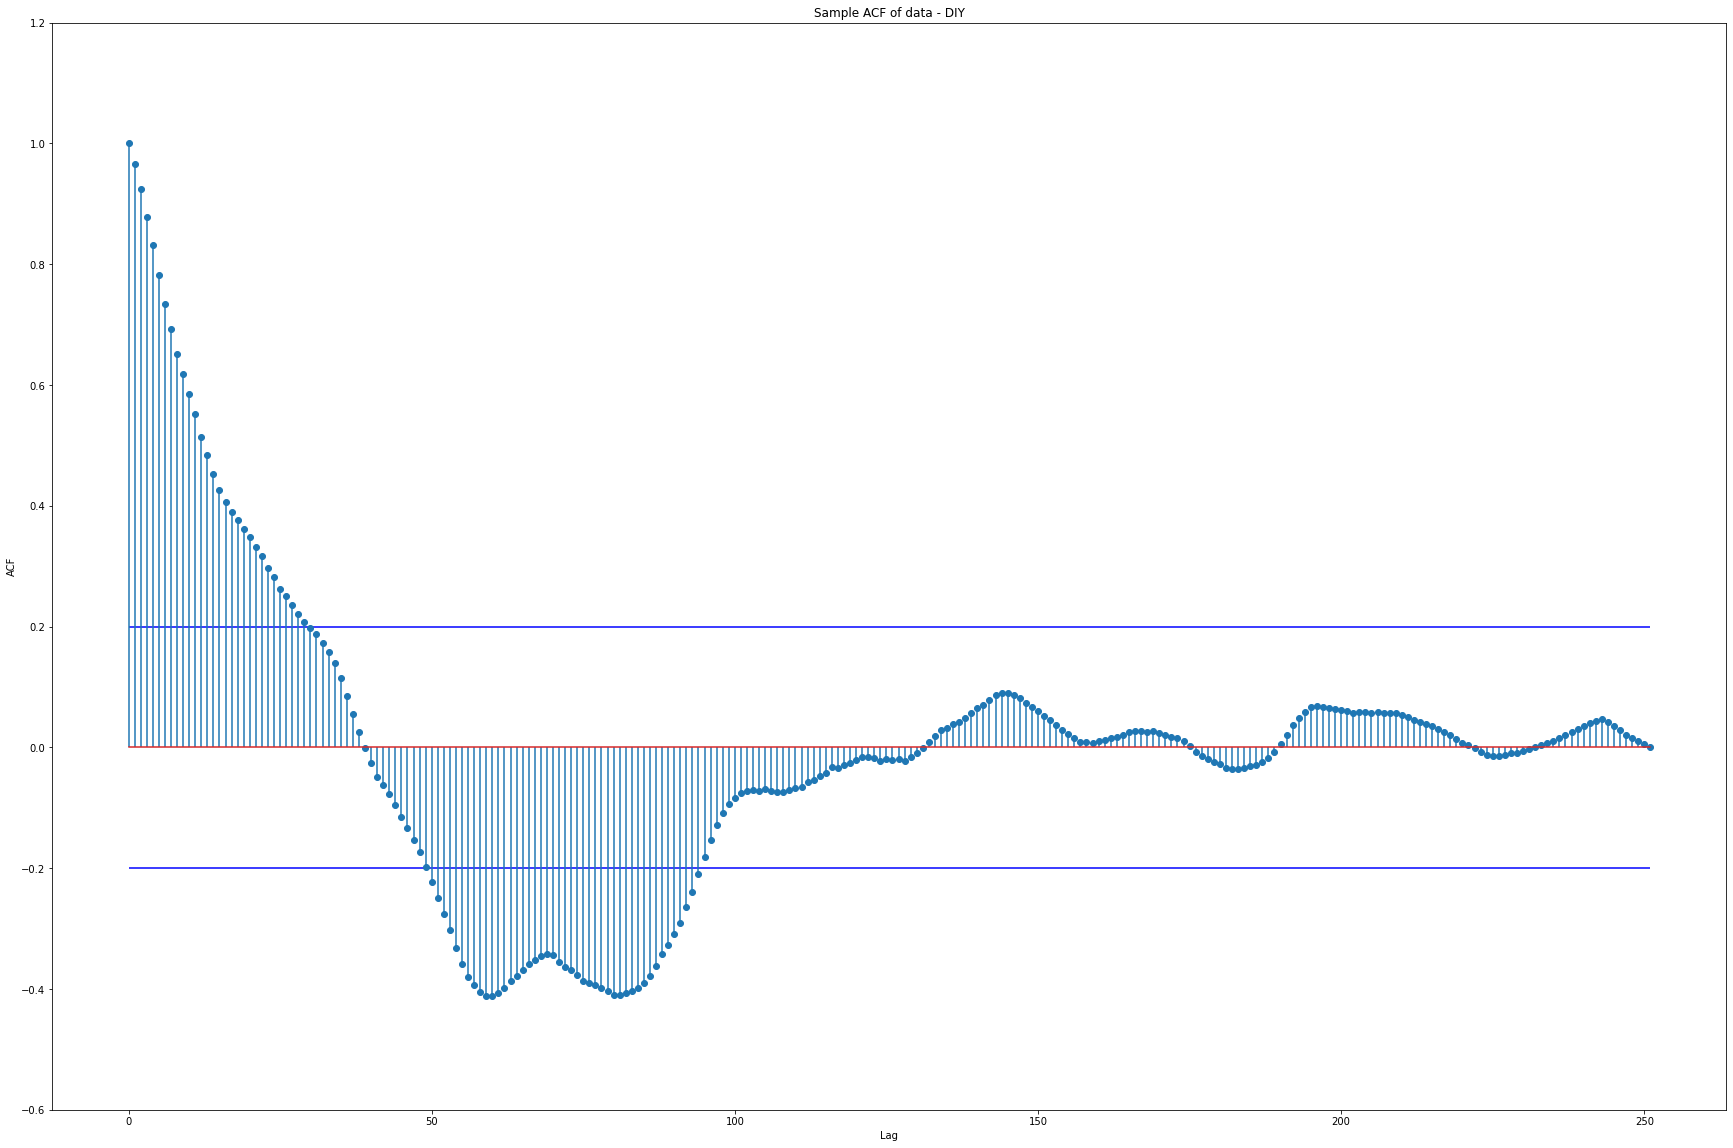

In [39]:
sampleACF_Analysis(np.nan_to_num(Belle))

In [21]:
# Major Time =)))))
import webbrowser as brws
brws.open("https://princess.disney.com/")
brws.open("https://www.twitch.tv/esl_csgo")


# Code by bu1th4nh
# Powered, inspired and motivated by EDM, Counter-Strike:Global Offensive and Disney Princesses

True

In [40]:
Belle

array([  9.85731766,   9.77964575,  10.31197384,  10.79429893,
        16.42663302,  17.9489511 ,  16.47128519,  16.09360928,
         4.03594137,   1.83827346,   0.92058955,   1.60292664,
         0.38525472,  -1.08241719,  -2.3800911 ,  -1.93775901,
        -4.78543592,  -4.19311083,  -7.14077774,  -7.15845266,
        -9.78612857, -12.25380048,  -6.92146939,  -7.6191373 ,
        -3.18681521,  -2.46448412,   0.34784196,   0.23017605,
         0.28250914,  -1.71517677,  -2.76283568,  -1.18051959,
        -2.5481855 ,  -2.25586242,  -4.26352833,   0.59880176,
         1.71113185,   3.74345994,   3.19578603,   5.87810812,
         5.8304342 ,   7.17276029,   6.41509438,   8.56741847,
         7.81974756,   7.56208165,   9.55440174,  10.76673782,
         9.81906991,  11.391391  ,  11.58372309,   9.50605018,
         6.28837827,   6.90070836,   5.02303344,   2.81535553,
        -7.14230638,  -6.77997629,  -7.4476602 , -10.07532111,
        -7.97300102,  -4.48066594,   0.14165815,   1.94